In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#extract the compress dataset

from zipfile import ZipFile
dataset = '/content/drive/MyDrive/FaceMask (1) (2).zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_496.jpg', 'with_mask_1526.jpg', 'with_mask_1157.jpg', 'with_mask_3198.jpg', 'with_mask_2166.jpg']
['with_mask_3230.jpg', 'with_mask_3369.jpg', 'with_mask_3407.jpg', 'with_mask_2175.jpg', 'with_mask_1154.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1806.jpg', 'without_mask_1444.jpg', 'without_mask_3276.jpg', 'without_mask_831.jpg', 'without_mask_2164.jpg']
['without_mask_3802.jpg', 'without_mask_68.jpg', 'without_mask_691.jpg', 'without_mask_3073.jpg', 'without_mask_2825.jpg']


In [ ]:
#creating the labels 0 and 1
with_mask_files = [0]*3725
without_mask_files = [1]*3828

In [ ]:
print(with_mask_files[:5])
print(without_mask_files[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [ ]:
labels = with_mask_files + without_mask_files

print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


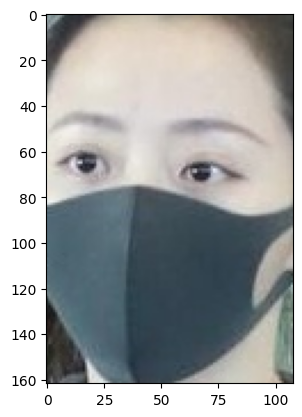

In [ ]:
#displaying with mask images

img = mping.imread('/content/data/with_mask/with_mask_1349.jpg')
imgplot = plt.imshow(img)
plt.show()

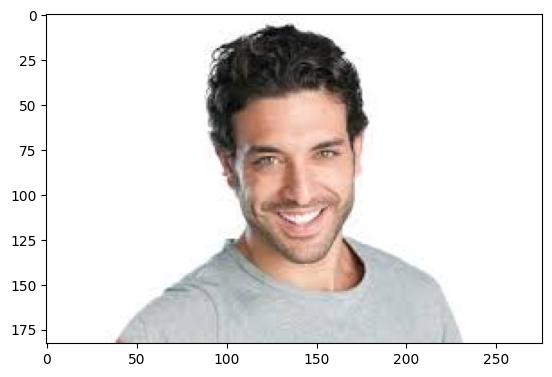

In [ ]:
#displaying a image without mask

img = mping.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#convert the images to numpy array

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in os.listdir(with_mask_path):
  img_path = os.path.join(with_mask_path , img_file)
  if os.path.isfile(img_path):
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
without_mask_path = '/content/data/without_mask/'

for img_file in os.listdir(without_mask_path):
  img_path = os.path.join(without_mask_path , img_file)
  if os.path.isfile(img_path):
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

array([[[ 57,  62,  81],
        [ 55,  62,  80],
        [ 53,  62,  79],
        ...,
        [ 87,  93, 116],
        [ 94, 101, 121],
        [102, 109, 127]],

       [[ 53,  59,  78],
        [ 55,  62,  80],
        [ 54,  62,  79],
        ...,
        [ 86,  91, 120],
        [ 94, 101, 126],
        [ 99, 105, 129]],

       [[ 51,  58,  77],
        [ 53,  60,  79],
        [ 52,  59,  77],
        ...,
        [ 85,  92, 119],
        [ 87,  94, 120],
        [ 95, 103, 127]],

       ...,

       [[228, 233, 237],
        [228, 233, 236],
        [228, 233, 236],
        ...,
        [223, 203, 196],
        [223, 203, 196],
        [222, 202, 195]],

       [[230, 235, 239],
        [230, 235, 239],
        [230, 234, 238],
        ...,
        [222, 202, 195],
        [221, 201, 194],
        [220, 200, 193]],

       [[232, 236, 239],
        [231, 235, 238],
        [231, 235, 239],
        ...,
        [220, 200, 193],
        [220, 200, 193],
        [220, 200, 193]]], dtype=uint8)
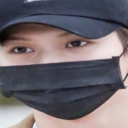

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape


(128, 128, 3)

In [ ]:
#converting image list and label list to array

y = np.array(labels)
X = np.array(data)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 2)
print(X.shape , X_train.shape , X_train.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (6042, 128, 128, 3)


In [ ]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.54509804, 0.58431373, 0.58039216],
        [0.6745098 , 0.71372549, 0.70980392],
        [0.7254902 , 0.76470588, 0.76078431],
        ...,
        [0.76078431, 0.62352941, 0.56470588],
        [0.7372549 , 0.61176471, 0.56078431],
        [0.64313725, 0.54117647, 0.50588235]],

       [[0.54509804, 0.58431373, 0.58039216],
        [0.6745098 , 0.71372549, 0.70980392],
        [0.7254902 , 0.76470588, 0.76078431],
        ...,
        [0.7254902 , 0.56078431, 0.50588235],
        [0.75686275, 0.60392157, 0.55686275],
        [0.7254902 , 0.6       , 0.56078431]],

       [[0.54509804, 0.58431373, 0.58039216],
        [0.6745098 , 0.71372549, 0.70980392],
        [0.7254902 , 0.76470588, 0.76078431],
        ...,
        [0.72156863, 0.50980392, 0.45098039],
        [0.81176471, 0.60784314, 0.56078431],
        [0.84705882, 0.68235294, 0.63921569]],

       ...,

       [[0.11764706, 0.16078431, 0.14509804],
        [0.11372549, 0.15294118, 0.13333333],
        [0.11764706, 0

### **Building Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32 , kernel_size = (3,3) , activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes , activation = 'sigmoid'))

In [ ]:
#compile the neural network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
#training the neural network
history = model.fit(X_train_scaled , y_train , validation_split=0.1 , epochs = 5)

Epoch 1/5
170/170 [==============================] - 191s 1s/step - loss: 0.3755 - accuracy: 0.8450 - val_loss: 0.2723 - val_accuracy: 0.8909
Epoch 2/5
170/170 [==============================] - 190s 1s/step - loss: 0.2296 - accuracy: 0.9106 - val_loss: 0.2386 - val_accuracy: 0.9058
Epoch 3/5
170/170 [==============================] - 157s 922ms/step - loss: 0.1790 - accuracy: 0.9301 - val_loss: 0.2213 - val_accuracy: 0.9240
Epoch 4/5
170/170 [==============================] - 154s 905ms/step - loss: 0.1469 - accuracy: 0.9422 - val_loss: 0.1894 - val_accuracy: 0.9306
Epoch 5/5
170/170 [==============================] - 142s 835ms/step - loss: 0.1101 - accuracy: 0.9586 - val_loss: 0.2385 - val_accuracy: 0.9256


In [ ]:
loss,accuracy = model.evaluate(X_test_scaled , y_test)
print('Test Accuarcy = ', accuracy)

48/48 [==============================] - 20s 405ms/step - loss: 0.2076 - accuracy: 0.9239
Test Accuarcy =  0.9238914847373962


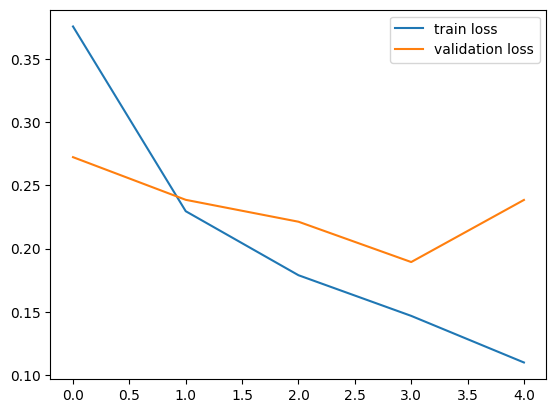

In [ ]:
h = history

#plot loss and accuracy

plt.plot(h.history['loss'] , label = 'train loss')
plt.plot(h.history['val_loss'] , label = 'validation loss')
plt.legend()
plt.show()

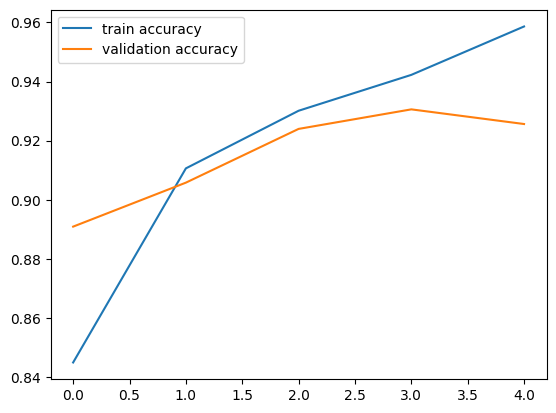

In [ ]:
plt.plot(h.history['accuracy'] , label = 'train accuracy')
plt.plot(h.history['val_accuracy'] , label = 'validation accuracy')
plt.legend()
plt.show()

path of the image to be predicted/content/drive/MyDrive/1200px-Actor_Mohanlal.jpg


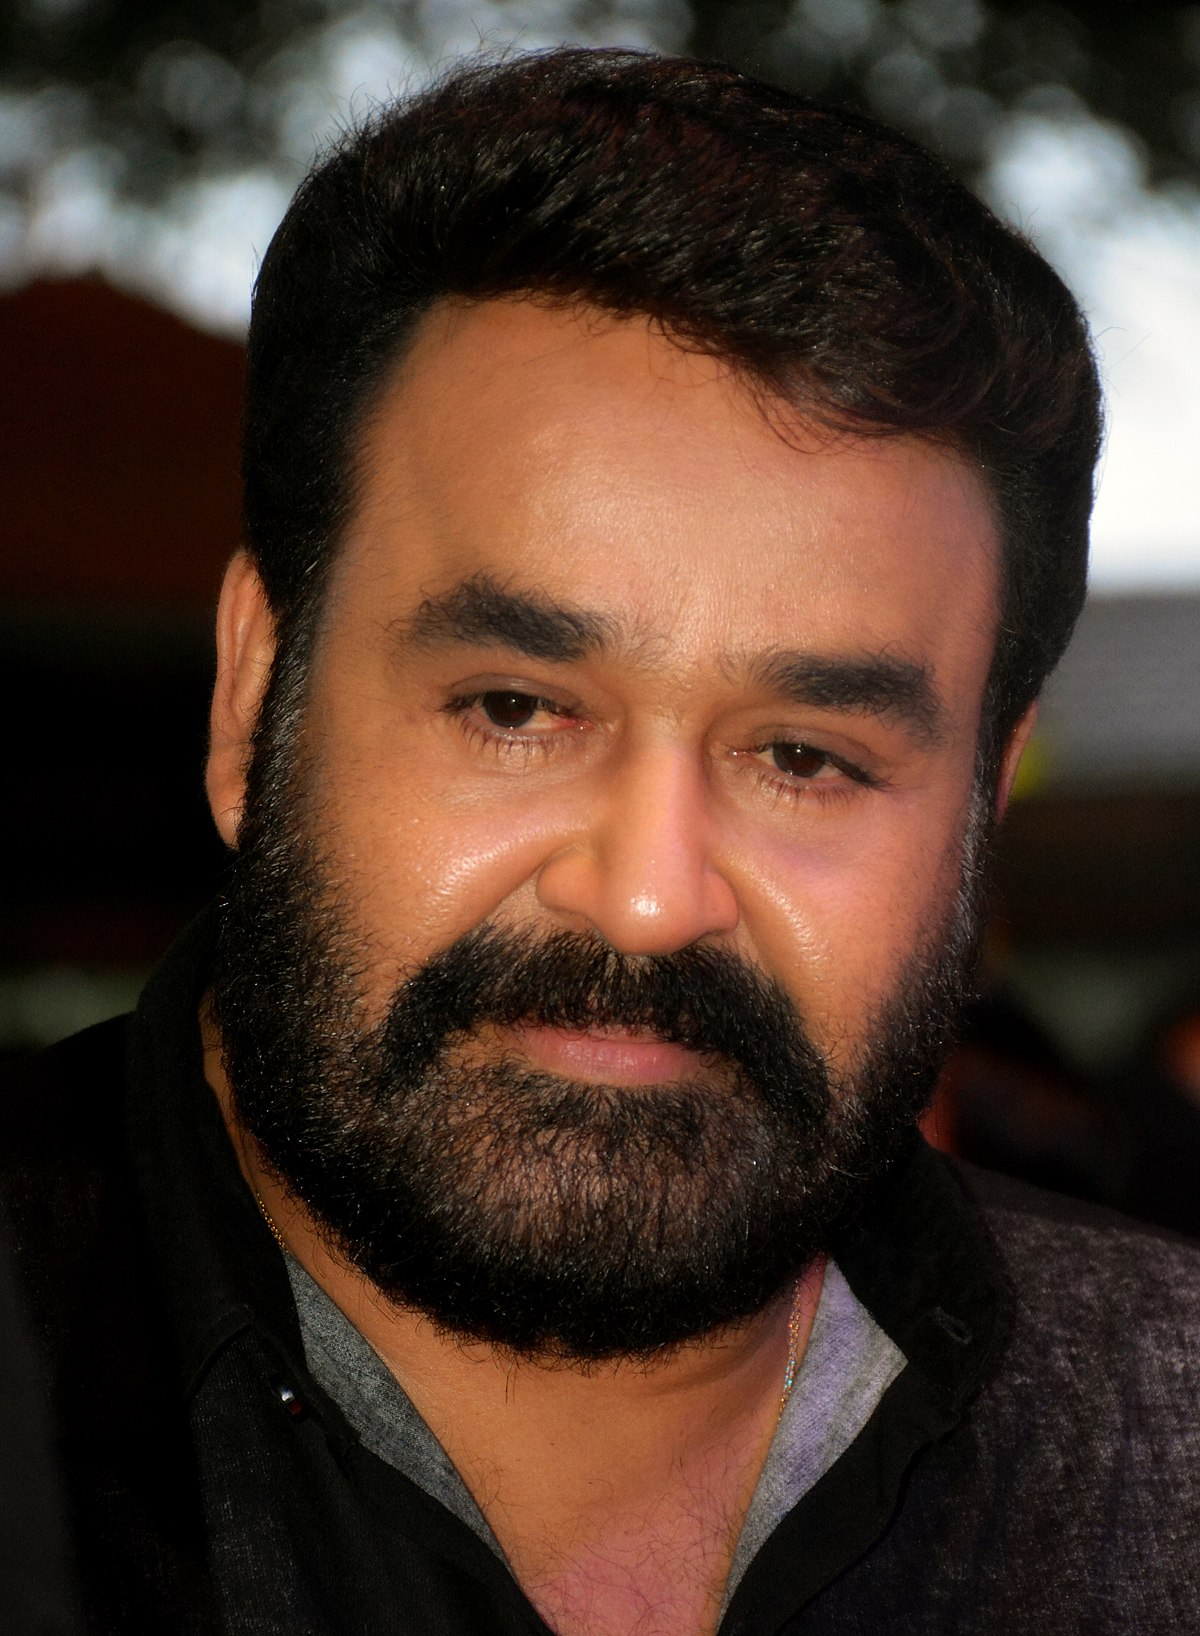

1/1 [==============================] - 0s 56ms/step
[[0.36232728 0.6160188 ]]
1
the person in the image is not wearing mask


In [ ]:
#predictive system

input_image_path = input('path of the image to be predicted')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image , (128,128))
input_image_scaled = input_image_resize/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('the person in the image is not wearing mask')
else:
  print('the person in the image is wearing a  mask')

